In [1]:
import pandas as pd
import torch
from matplotlib.pyplot import *
from time import time

# Part 1: Prediction with Hardcoded Model

In [2]:
df = pd.read_csv("train.csv")
trainY = df.values[:,-1:]
trainY = torch.from_numpy(trainY).to(torch.float64)
length = len(df.values[1,:])
trainX = df.values[:,0:length - 1]
trainX = torch.from_numpy(trainX).to(torch.float64)

df = pd.read_csv("test.csv")
testY = df.values[:,-1:]
testY = torch.from_numpy(testY).to(torch.float64)
length = len(df.values[1,:])
testX = df.values[:,0:length - 1]
testX = torch.from_numpy(testX).to(torch.float64)

In [3]:
coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]
], dtype=torch.float64)
coef

tensor([[0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0300],
        [0.0300],
        [0.0300],
        [0.0300]], dtype=torch.float64)

In [4]:
if torch.cuda.is_available():
    trainX.to("cuda")
    trainY.to("cuda")
    testX.to("cuda")
    testY.to("cuda")
    coef.to("cuda")

In [5]:
(testX[0] @ coef).item()

9.844

# Part 2: R^2 Score

In [6]:
predictedY = testX @ coef

In [7]:
def r2_score(test, predicted):
    mean = torch.mean(test)
    SStot = torch.sum((test - mean)**2) 
    SSreg = torch.sum((test - predicted)**2)
    improvement = SStot - SSreg
    return improvement/SStot

In [8]:
r2_score(testY, predictedY)

tensor(0.4110, dtype=torch.float64)

# Part 3: Optimization

In [9]:
x = torch.tensor(0.0, requires_grad=True)
y = x**2 - 8*x + 19
y

tensor(19., grad_fn=<AddBackward0>)

In [10]:
optimizer = torch.optim.SGD([x], lr=0.1)

In [11]:
for i in range(30):
    optimizer.zero_grad()
    y = x**2 - 8*x + 19
    y.backward()
    optimizer.step()
    print(x, y)

tensor(0.8000, requires_grad=True) tensor(19., grad_fn=<AddBackward0>)
tensor(1.4400, requires_grad=True) tensor(13.2400, grad_fn=<AddBackward0>)
tensor(1.9520, requires_grad=True) tensor(9.5536, grad_fn=<AddBackward0>)
tensor(2.3616, requires_grad=True) tensor(7.1943, grad_fn=<AddBackward0>)
tensor(2.6893, requires_grad=True) tensor(5.6844, grad_fn=<AddBackward0>)
tensor(2.9514, requires_grad=True) tensor(4.7180, grad_fn=<AddBackward0>)
tensor(3.1611, requires_grad=True) tensor(4.0995, grad_fn=<AddBackward0>)
tensor(3.3289, requires_grad=True) tensor(3.7037, grad_fn=<AddBackward0>)
tensor(3.4631, requires_grad=True) tensor(3.4504, grad_fn=<AddBackward0>)
tensor(3.5705, requires_grad=True) tensor(3.2882, grad_fn=<AddBackward0>)
tensor(3.6564, requires_grad=True) tensor(3.1845, grad_fn=<AddBackward0>)
tensor(3.7251, requires_grad=True) tensor(3.1181, grad_fn=<AddBackward0>)
tensor(3.7801, requires_grad=True) tensor(3.0756, grad_fn=<AddBackward0>)
tensor(3.8241, requires_grad=True) tenso

In [12]:
x.item()

3.9950480461120605

<function matplotlib.pyplot.show(close=None, block=None)>

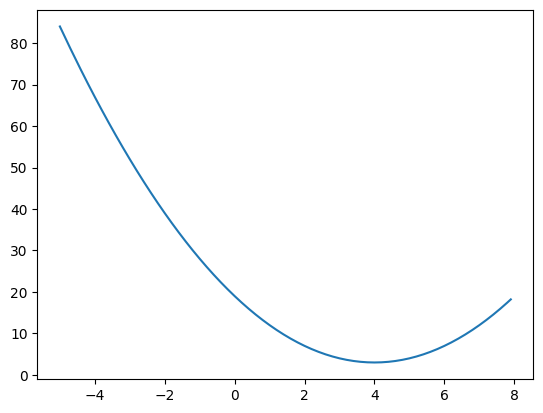

In [13]:
x = torch.arange(-5, 8, 0.1)
y = x**2 - 8*x + 19
plot(x, y)
show

# Part 4: Linear Regression

In [14]:
train = torch.utils.data.TensorDataset(trainX, trainY)
loader = torch.utils.data.DataLoader(train, shuffle = True, batch_size = 10)
model = torch.nn.Linear(10, 1, dtype = torch.float64)
optimizer = torch.optim.SGD(model.parameters(), lr=0.000001)
criterion = torch.nn.MSELoss() 
epochs = 100

In [15]:
start = time()
for epoch in range(epochs):
    for data in loader:
        optimizer.zero_grad()
        inputs, labels = data
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
end  = time()

In [16]:
predictedY = model(testX)
r2_score(testY, predictedY)

tensor(0.5599, dtype=torch.float64, grad_fn=<DivBackward0>)

In [17]:
print((end - start))

3.4374377727508545


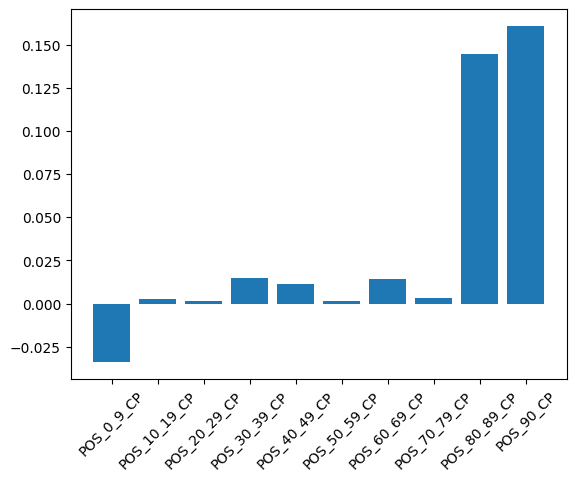

In [18]:
weight = model.weight.detach()[0]
bar(df.columns[:-1], weight)
tick_params(axis='x', rotation=45)